In [30]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from datetime import datetime
from scipy.interpolate import CubicSpline

In [2]:
# Read in the data
names = ['movie', 'relation', 'dl']
types= ['U30', 'U20', 'U20']
death_log = np.genfromtxt('death_log.dat', delimiter=';', comments='#', dtype=list(zip(names,types)))
names = ['movie', 'date']
types= ['U30', 'U20']
movies = np.genfromtxt('movies.dat', delimiter=';', comments='#', dtype=list(zip(names,types)))
for i,m in enumerate(movies):
    movies[i]['date'] = movies[i]['date'].strip()
    movies[i]['movie'] = movies[i]['movie'].strip()

In [3]:
# Make an array to hold the relevant data in better dtypes
names = ['movie', 'relation', 'live', 'date', 'dt']
types = ['U30', 'U20', bool, '<M8[D]', float]
data = np.zeros(death_log.size, dtype=list(zip(names, types)))

In [4]:
for i, dl in enumerate(death_log):
    data[i]['movie'] = dl['movie'].strip()
    data[i]['relation'] = dl['relation'].strip()
    if dl['dl'].strip() == 'lived':
        data[i]['live'] = True
    else:
        data[i]['live'] = False
    match_name = np.where(movies['movie'] == dl['movie'].strip())[0]
    datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
    dto = datetime.strptime(movies['date'][match_name][0], '%B %d, %Y')
    data[i]['date'] = np.datetime64(dto)
    
data['dt'] = (data['date'] - np.datetime64('1900', 'Y')).astype(float)/365.25 + 1900


In [5]:
((data['date'] - np.datetime64('1900', 'Y'))).astype(float)/365.25 + 1900

array([2003.40588638, 2003.40588638, 1942.61190965, 1942.61190965,
       1942.61190965, 1942.61190965, 1981.51950719, 2016.89253936,
       2016.89253936, 2016.89253936, 2013.88911704, 2013.88911704,
       2013.88911704, 1994.45037645, 1994.45037645, 1994.45037645,
       1994.45037645, 2017.88911704, 2017.88911704, 2017.88911704,
       2017.88911704, 2017.88911704, 2017.88911704, 2017.88911704,
       2004.84325804, 2004.84325804, 2004.84325804, 1989.87542779,
       1941.80698152, 1940.09856263, 1955.46885695, 1955.46885695,
       1955.46885695, 1955.46885695, 1970.97604381, 1970.97604381,
       1970.97604381, 1991.88774812, 1995.4715948 , 1996.46817248,
       1951.56741958, 1998.46132786, 1998.46132786, 1998.46132786,
       1999.45790554, 1999.45790554, 2002.46680356, 2009.94113621,
       2003.83025325, 2003.83025325, 2012.47091034, 2012.47091034])

In [6]:
# Let's print out some basic stats
u_relations = np.unique(data['relation'])
print('in %i Disney/Pixar movies' % np.size(np.unique(data['movie'])))

print('Relation, N total, N lived, N died, frac died')
for relation in u_relations:
    match = np.where(data['relation'] == relation)[0]
    n_lived = np.size(np.where(data['live'][match] == True)[0])
    n_died = np.size(np.where(data['live'][match] == False)[0])
    n_tot = np.size(match)
    
    print(relation, n_tot, n_lived, n_died, n_died/n_tot)
print ('(plus a litter of 15 dalmations all lived)')

in 23 Disney/Pixar movies
Relation, N total, N lived, N died, frac died
aunt 1 1 0 0.0
brother 2 1 1 0.5
daughter 6 6 0 0.0
father 13 10 3 0.23076923076923078
grandmother 3 2 1 0.3333333333333333
greatgrandmother 1 0 1 1.0
mother 13 7 6 0.46153846153846156
sister 4 4 0 0.0
son 7 7 0 0.0
uncle 2 1 1 0.5
(plus a litter of 15 dalmations all lived)


In [7]:
# Maybe make a seperate file for referenced or strongly implied parent deaths (Little Mermaid, Sword in the Stone, Lilo and Stitch, Cinderella, etc.)

In [8]:
# Maybe look at plots of mother and father mortality as a function of time.

In [9]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


In [10]:
data.sort(order='dt')

Text(0,0.5,'Fraction of Surviving Fathers')

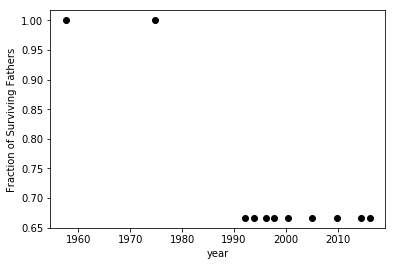

In [11]:
good = np.where(data['relation'] == 'father')
ave_father = moving_average(data['live'][good], n=3)
ave_time_f = moving_average(data['dt'][good], n=3)
plt.plot(ave_time_f, ave_father, 'ko')
plt.xlabel('year')
plt.ylabel("Fraction of Surviving Fathers")

Text(0,0.5,'Fraction of Surviving Mothers')

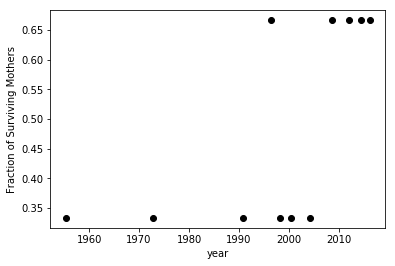

In [12]:
good = np.where(data['relation'] == 'mother')
ave_mother = moving_average(data['live'][good], n=3)
ave_time_m = moving_average(data['dt'][good], n=3)
plt.plot(ave_time_m, ave_mother, 'ko')
plt.xlabel('year')
plt.ylabel("Fraction of Surviving Mothers")

Text(0.5,1,'Disney/Pixar Protagonist Relatives\n(three film rolling mean)')

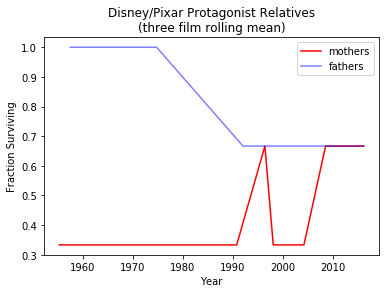

In [19]:
plt.plot(ave_time_m, ave_mother, 'r', label='mothers')
plt.plot(ave_time_f, ave_father, 'b', alpha=0.5, label='fathers')
plt.legend()
plt.ylabel('Fraction Surviving')
plt.xlabel('Year')
plt.title('Disney/Pixar Protagonist Relatives\n(three film rolling mean)')